In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

In [2]:
salaries = pd.read_csv('/Users/aamirpirani/Desktop/Data_Analysis/Le_Wagon_ML/Data/ml-salaries.csv')

## Data Exploration

In [3]:
salaries.shape

(1802, 7)

In [4]:
salaries.dtypes

Gender               int64
Age                  int64
Department          object
Department_code      int64
Years_exp          float64
Tenure (months)      int64
Salary               int64
dtype: object

In [5]:
round(salaries.describe())

,Gender,Age,Department_code,Years_exp,Tenure (months),Salary
count,1802.0,1802.0,1802.0,1802.0,1802.0,1802.0
mean,0.0,32.0,4.0,11.0,48.0,175827.0
std,0.0,5.0,2.0,3.0,36.0,105513.0
min,0.0,21.0,0.0,6.0,6.0,256.0
25%,0.0,28.0,2.0,9.0,23.0,104217.0
50%,0.0,31.0,4.0,10.0,39.0,150330.0
75%,1.0,35.0,7.0,12.0,66.0,221136.0
max,1.0,56.0,7.0,23.0,190.0,1024965.0


In [6]:
salaries[["Department", "Salary"]]

,Department,Salary
0,Tech,74922
1,Operations,44375
2,Operations,82263
3,Operations,44375
4,Engineering,235405
...,...,...
1797,Other,88934
1798,Engineering,133224
1799,Operations,72547
1800,Other,227176


## Linear Regression

In [7]:
features = salaries.drop(['Salary', 'Department'], axis='columns')
target = salaries['Salary']

In [8]:
features

,Gender,Age,Department_code,Years_exp,Tenure (months)
0,0,25,7,7.5,7
1,1,26,3,8.0,6
2,0,24,3,7.0,8
3,0,26,3,8.0,6
4,0,29,0,9.5,25
...,...,...,...,...,...
1797,0,29,4,9.5,34
1798,0,27,0,8.5,33
1799,0,29,3,9.5,15
1800,0,47,4,18.5,30


In [9]:
from sklearn.linear_model import LinearRegression

In [10]:
model = LinearRegression()

## Model Training

In [11]:
model.fit(features, target)

LinearRegression()

## R-Square

In [12]:
model.score(features, target)

0.43754799942321354

## Predictions

In [13]:
hire = [[0, 19, 7, 1, 10]]

In [14]:
model.predict(hire)

/Users/aamirpirani/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([15123.2836477])

## Coefficients

In [15]:
model.coef_

array([-24245.70669339,   9467.18023663,   2351.48450104,   4733.59011832,
          249.19491939])

In [16]:
pd.concat([pd.DataFrame(features.columns),pd.DataFrame(np.transpose(model.coef_))], axis = 1)

,0,0
0,Gender,-24245.706693
1,Age,9467.180237
2,Department_code,2351.484501
3,Years_exp,4733.590118
4,Tenure (months),249.194919


## Intercept 

In [17]:
model.intercept_

-188439.07166781538

## Visualizations 

In [18]:
import matplotlib.pyplot as plt

### Distribution of Age 

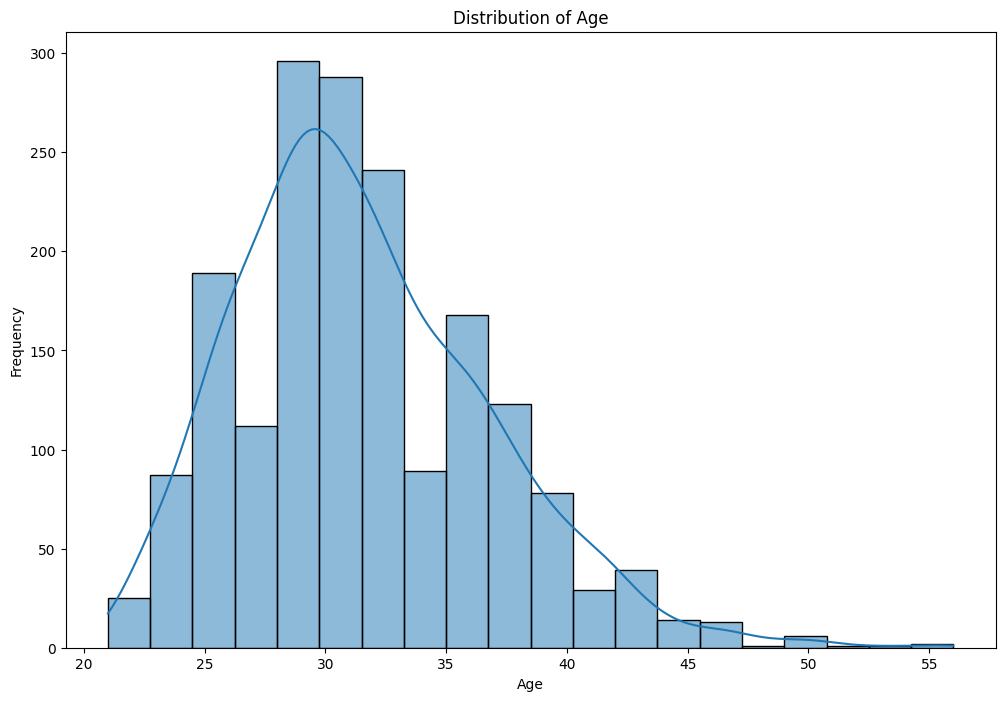

In [19]:
plt.figure(figsize=(12, 8))
sns.histplot(salaries['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

### Distribution of Years of Experience 

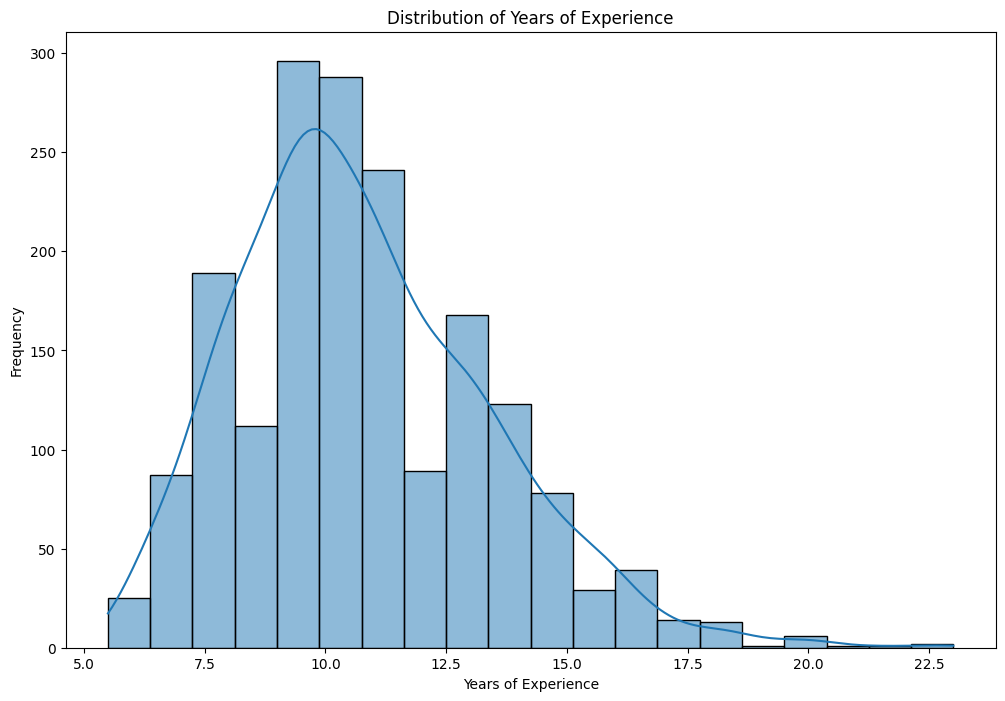

In [20]:
plt.figure(figsize=(12, 8))
sns.histplot(salaries['Years_exp'], bins=20, kde=True)
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Frequency')
plt.show()

### Boxplot

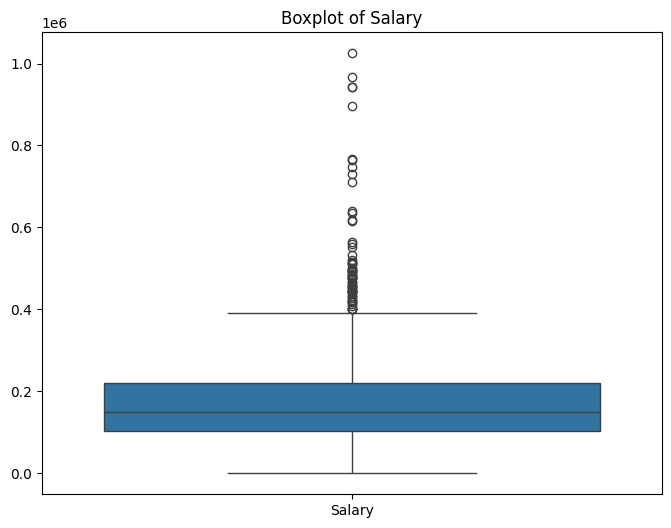

In [21]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=salaries[['Salary']])
plt.title('Boxplot of Salary')
plt.show()

### Average Salary by Department

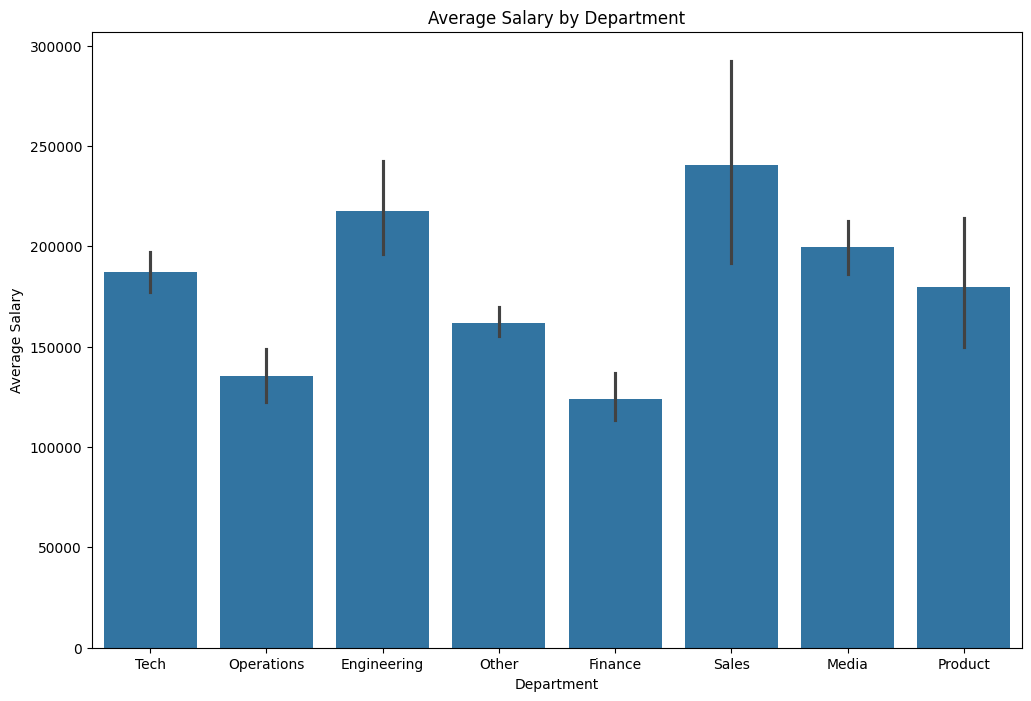

In [22]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Department', y='Salary', data=salaries)
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.show()

### Age vs Salary

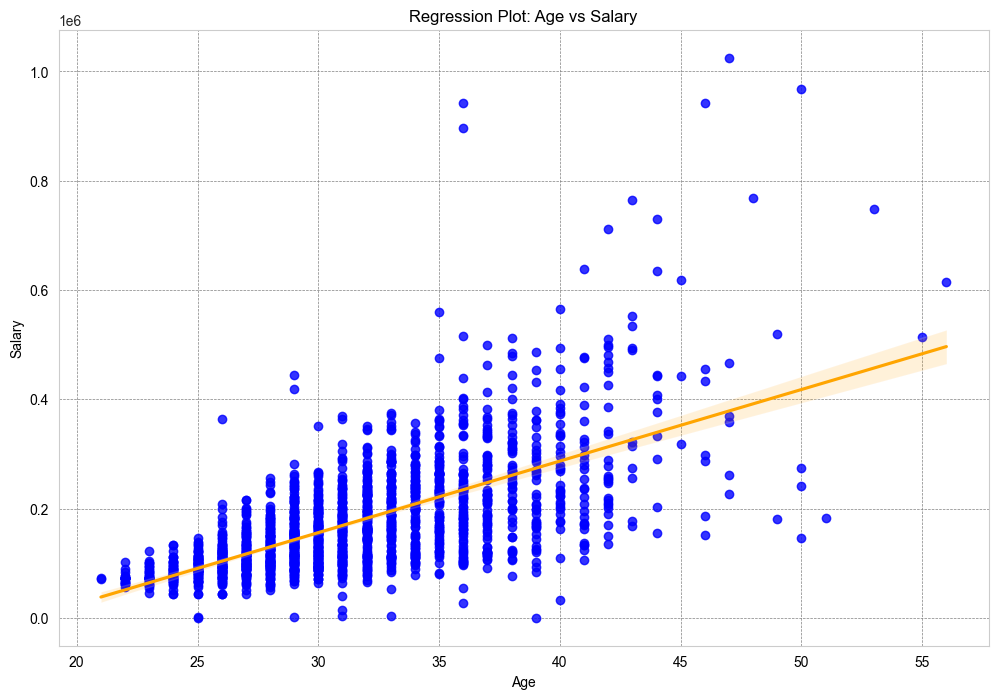

In [23]:
sns.set_style("whitegrid")
sns.set_palette("husl")

plt.figure(figsize=(12, 8))
sns.regplot(x='Age', y='Salary', data=salaries, scatter_kws={'color': 'blue'}, line_kws={'color': 'orange'})
plt.title('Regression Plot: Age vs Salary', color='black') 
plt.xlabel('Age', color='black')  
plt.ylabel('Salary', color='black')  
plt.xticks(color='black') 
plt.yticks(color='black')  
plt.grid(color='gray', linestyle='--', linewidth=0.5) 
plt.show()